In [1]:
from  google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import statsmodels.api as sm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

In [3]:
# Leer el archivo CSV
archivo_csv = '/content/drive/MyDrive/MIT micromaster/Grupo 3 - DATA/df_result_3_tomodel_noh_enaho.csv'
datos = pd.read_csv(archivo_csv)

In [4]:
# Add Mes-num
meses = ['ENERO', 'FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO', 'AGOSTO','SETIEMBRE','OCTUBRE','NOVIEMBRE', 'DICIEMBRE' ]
diccionario = {mes : i+1 for i, mes in enumerate(meses)}
datos["MES_NUM"] = datos["MES"].apply(lambda x: diccionario.get(x,None))

In [5]:
datos.sort_values(by=['VACUNA','PROVINCIA','ANIO','MES_NUM'], inplace=True)

In [6]:
datos.rename(columns={"CANTIDAD DE PERSONAL": "CANTIDAD_DE_PERSONAL"}, inplace = True)

In [7]:
datos["ANIO"] = datos["ANIO"].astype(str)

In [20]:
datos[['PROVINCIA' , 'CANTIDAD']]

,PROVINCIA,CANTIDAD
36,ATALAYA,3
40,ATALAYA,29
52,ATALAYA,22
24,ATALAYA,3
56,ATALAYA,35
...,...,...
2311,PURUS,0
2351,PURUS,0
2347,PURUS,1
2343,PURUS,2


from matplotlib import pyplot as plt
_df_5['CANTIDAD'].plot(kind='hist', bins=20, title='CANTIDAD')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('PROVINCIA').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['CANTIDAD'].plot(kind='line', figsize=(8, 4), title='CANTIDAD')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['PROVINCIA'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='CANTIDAD', y='PROVINCIA', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-21-f10895c0232c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_8, x='CANTIDAD', y='PROVINCIA', inner='box', palette='Dark2')


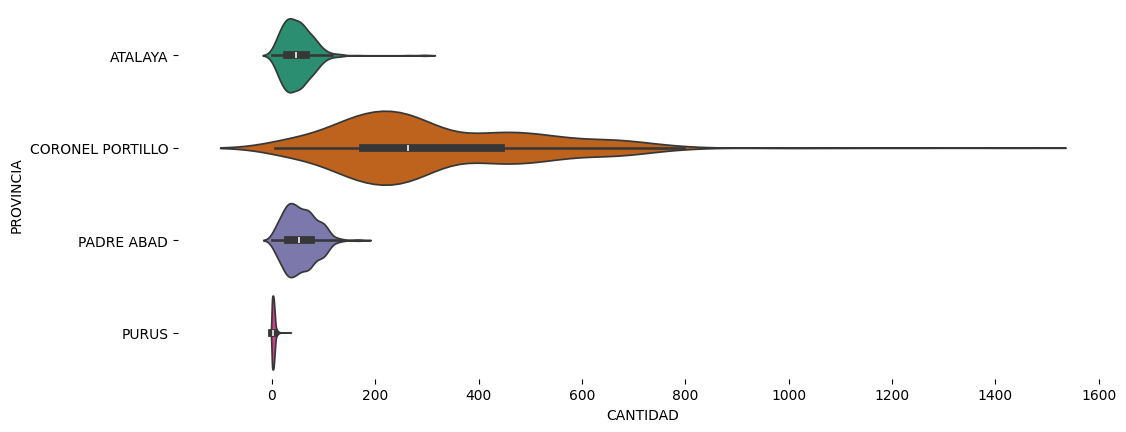

In [21]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['PROVINCIA'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='CANTIDAD', y='PROVINCIA', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<ipython-input-19-396c9007407b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(_df_4, x='CANTIDAD_DE_PERSONAL', y='PROVINCIA', inner='box', palette='Dark2')


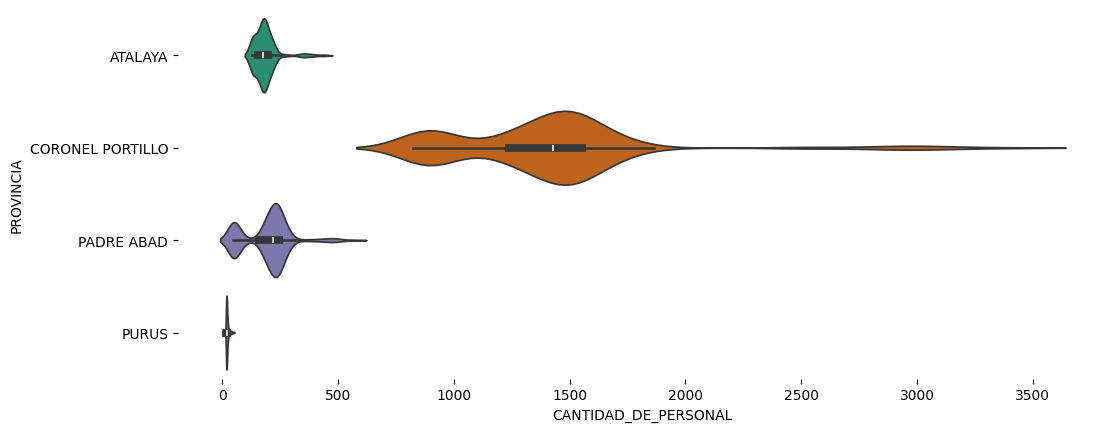

In [19]:
from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['PROVINCIA'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='CANTIDAD_DE_PERSONAL', y='PROVINCIA', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from matplotlib import pyplot as plt
_df_3['CANTIDAD_DE_PERSONAL'].plot(kind='line', figsize=(8, 4), title='CANTIDAD_DE_PERSONAL')
plt.gca().spines[['top', 'right']].set_visible(False)

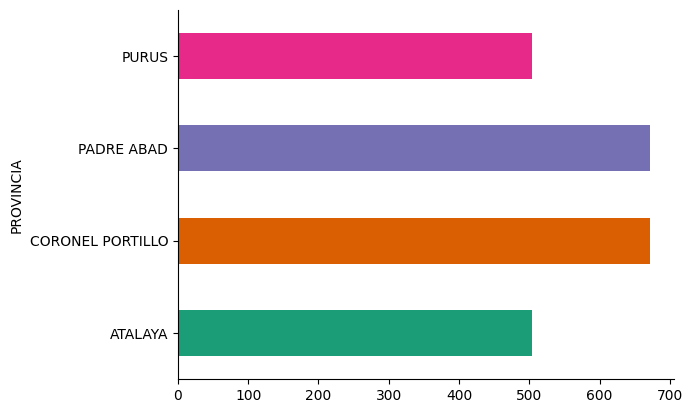

In [16]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('PROVINCIA').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Shifting
df_list=[]
for item,df_group in datos.groupby(['PROVINCIA','VACUNA']):
  df_group.set_index(['VACUNA', 'ANIO', 'MES', 'PROVINCIA', 'RANGO_EDAD',
       'CANTIDAD_DE_PERSONAL', 'POBLACION', 'PRESUPUESTO',
       'UBIGEO', 'ALFABETISMO', 'AGUA_POTABLE', 'DEMORA_CITA_horas',
       'DEMORA_TRASLADO_horas', 'MES_NUM'], inplace = True)
  df_group_shifted = df_group.shift(2)
  df_group_shifted.reset_index(inplace=True)
  df_list.append(df_group_shifted)
df_shifted_total = pd.concat(df_list)

In [ ]:
#df = df_shifted_total
df = df_shifted_total.dropna(subset=['CANTIDAD'])
datos = df

In [ ]:
# Log
#datos["CANTIDAD"]              = np.log(datos["CANTIDAD"] + 1)
#datos["PRESUPUESTO"]           = np.log(datos["PRESUPUESTO"] + 1)
#datos["POBLACION"]             = np.log(datos["POBLACION"] + 1)
#datos["CANTIDAD_DE_PERSONAL"]  = np.log(datos["CANTIDAD_DE_PERSONAL"] + 1)

<ipython-input-84-365979bd5676>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["CANTIDAD"]              = np.log(datos["CANTIDAD"] + 1)
<ipython-input-84-365979bd5676>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["PRESUPUESTO"]           = np.log(datos["PRESUPUESTO"] + 1)
<ipython-input-84-365979bd5676>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [ ]:
from sklearn.preprocessing import StandardScaler
cols_to_standardize = ["CANTIDAD_DE_PERSONAL", "PRESUPUESTO", "POBLACION" ,"ALFABETISMO", "AGUA_POTABLE", "DEMORA_CITA_horas", "DEMORA_TRASLADO_horas"] # Lista de columnas a estandarizar
scaler = StandardScaler()
scaler.fit(datos[cols_to_standardize])
datos[cols_to_standardize] = scaler.transform(datos[cols_to_standardize])
datos

<ipython-input-26-db3f47d5e587>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos[cols_to_standardize] = scaler.transform(datos[cols_to_standardize])


,VACUNA,ANIO,MES,PROVINCIA,RANGO_EDAD,CANTIDAD_DE_PERSONAL,POBLACION,PRESUPUESTO,UBIGEO,ALFABETISMO,AGUA_POTABLE,DEMORA_CITA_horas,DEMORA_TRASLADO_horas,MES_NUM,CANTIDAD,c
2,AMA,2020,MARZO,ATALAYA,1_ANIO,-0.603760,-1.430933,-0.168149,250200,-0.407992,-0.093811,0.166080,-0.340875,3,3.0,AMAATALAYA
3,AMA,2020,ABRIL,ATALAYA,1_ANIO,-0.595925,-1.430933,-0.021198,250200,0.796308,2.500995,-0.416193,-0.555991,4,29.0,AMAATALAYA
4,AMA,2020,MAYO,ATALAYA,1_ANIO,-0.602193,-1.430933,-0.261718,250200,2.472469,-1.082991,-0.416193,-0.555991,5,22.0,AMAATALAYA
5,AMA,2020,JUNIO,ATALAYA,1_ANIO,-0.597492,-1.430933,-0.243022,250200,2.944329,-0.552561,-0.416193,-0.555991,6,3.0,AMAATALAYA
6,AMA,2020,JULIO,ATALAYA,1_ANIO,-0.606895,-1.430933,-0.046268,250200,1.296340,0.508299,-0.416193,-0.555991,7,35.0,AMAATALAYA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,VARI,2022,AGOSTO,PURUS,1_ANIO,-0.776141,-0.897777,-0.104038,250400,-1.415097,-1.082991,-0.416193,-0.555991,8,1.0,VARIPURUS
32,VARI,2022,SETIEMBRE,PURUS,1_ANIO,-0.776141,-0.897777,-0.299878,250400,-1.415097,-1.082991,-0.416193,-0.555991,9,0.0,VARIPURUS
33,VARI,2022,OCTUBRE,PURUS,1_ANIO,-0.769872,-0.897777,-0.650439,250400,-1.415097,-1.082991,-0.416193,-0.555991,10,0.0,VARIPURUS
34,VARI,2022,NOVIEMBRE,PURUS,1_ANIO,-0.769872,-0.897777,-0.337487,250400,-1.415097,-1.082991,-0.416193,-0.555991,11,0.0,VARIPURUS


In [ ]:
datos.columns

Index(['VACUNA', 'ANIO', 'MES', 'PROVINCIA', 'RANGO_EDAD',
       'CANTIDAD_DE_PERSONAL', 'POBLACION', 'PRESUPUESTO', 'UBIGEO',
       'ALFABETISMO', 'AGUA_POTABLE', 'DEMORA_CITA_horas',
       'DEMORA_TRASLADO_horas', 'MES_NUM', 'CANTIDAD'],
      dtype='object')

## Con Purus

In [ ]:
datos["c"] = datos["VACUNA"].astype(str) + datos["PROVINCIA"].astype(str)

<ipython-input-12-776fa8287376>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos["c"] = datos["VACUNA"].astype(str) + datos["PROVINCIA"].astype(str)


In [ ]:
model = sm.MixedLM.from_formula("CANTIDAD ~ CANTIDAD_DE_PERSONAL + PRESUPUESTO + POBLACION + ALFABETISMO + AGUA_POTABLE + DEMORA_CITA_horas + DEMORA_TRASLADO_horas", data=datos, groups=datos["c"])
result = model.fit()

print(result.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    CANTIDAD   
No. Observations:      2240       Method:                REML       
No. Groups:            56         Scale:                 8133.1848  
Min. group size:       34         Log-Likelihood:        -13316.9980
Max. group size:       46         Converged:             Yes        
Mean group size:       40.0                                         
--------------------------------------------------------------------
                       Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------------
Intercept              116.555    7.477 15.589 0.000 101.901 131.209
CANTIDAD_DE_PERSONAL   120.807    6.338 19.061 0.000 108.385 133.230
PRESUPUESTO              5.937    2.020  2.939 0.003   1.977   9.896
POBLACION                5.164    8.097  0.638 0.524 -10.706  21.034
ALFABETISMO             -7.375    2.695 -2.736 0.0

In [ ]:
# Predicciones en el conjunto de prueba
y_pred = result.predict(X_test)

# Evaluación del modelo en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

# Baselines
mean_baseline_mse = mean_squared_error(y_test, np.full_like(y_test, y_train.mean()))
max_baseline_mse = mean_squared_error(y_test, np.full_like(y_test, y_train.max()))
print(f"Mean Baseline MSE: {mean_baseline_mse}")
print(f"Max Baseline MSE: {max_baseline_mse}")

# Resumen del modelo
print(result.summary())

In [ ]:
predictions = result.predict()

# Calcula el R²
y_mean = np.mean(datos['CANTIDAD'])
sst = np.sum((datos['CANTIDAD'] - y_mean)**2)
ssr = np.sum((datos['CANTIDAD'] - predictions)**2)
r_squared = 1 - (ssr / sst)

# Calcula el MSE
mse = mean_squared_error(datos['CANTIDAD'], predictions)

print("R²:", r_squared)
print("MSE:", mse)

R²: 0.588645118833693
MSE: 11188.42425556609


In [ ]:
predictions = result.predict()

# Calcula el R²
y_mean = np.mean(np.exp(datos['CANTIDAD'])-1)
sst = np.sum((np.exp(datos['CANTIDAD'])-1 - y_mean)**2)
ssr = np.sum((np.exp(datos['CANTIDAD'])-1 - (np.exp(predictions)-1))**2)
r_squared = 1 - (ssr / sst)

# Calcula el MSE
mse = mean_squared_error(np.exp(datos['CANTIDAD'])-1, np.exp(predictions)-1)

print("R²:", r_squared)
print("MSE:", mse)

## Sin Purus

In [ ]:
# Remove Purus
df = df_shifted_total[df_shifted_total['PROVINCIA'] != 'PURUS']

In [ ]:
df = df.dropna(subset=['CANTIDAD'])
datos = df

In [ ]:
from sklearn.preprocessing import StandardScaler
cols_to_standardize = ["CANTIDAD_DE_PERSONAL", "PRESUPUESTO", "POBLACION" ,"ALFABETISMO", "AGUA_POTABLE", "DEMORA_CITA_horas", "DEMORA_TRASLADO_horas"] # Lista de columnas a estandarizar
scaler = StandardScaler()
scaler.fit(datos[cols_to_standardize])
datos[cols_to_standardize] = scaler.transform(datos[cols_to_standardize])
datos

,VACUNA,ANIO,MES,PROVINCIA,RANGO_EDAD,CANTIDAD_DE_PERSONAL,POBLACION,PRESUPUESTO,UBIGEO,ALFABETISMO,AGUA_POTABLE,DEMORA_CITA_horas,DEMORA_TRASLADO_horas,MES_NUM,CANTIDAD
2,AMA,2020,MARZO,ATALAYA,1_ANIO,-0.788475,-1.673973,-0.199325,250200,-1.016222,-0.414373,0.048876,-0.455025,3,3.0
3,AMA,2020,ABRIL,ATALAYA,1_ANIO,-0.780877,-1.673973,-0.064586,250200,0.606270,2.370832,-0.480357,-0.654419,4,29.0
4,AMA,2020,MAYO,ATALAYA,1_ANIO,-0.786955,-1.673973,-0.285117,250200,2.864475,-1.476137,-0.480357,-0.654419,5,22.0
5,AMA,2020,JUNIO,ATALAYA,1_ANIO,-0.782397,-1.673973,-0.267975,250200,3.500188,-0.906785,-0.480357,-0.654419,6,3.0
6,AMA,2020,JULIO,ATALAYA,1_ANIO,-0.791514,-1.673973,-0.087573,250200,1.279936,0.231917,-0.480357,-0.654419,7,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43,VARI,2022,AGOSTO,PADRE ABAD,1_ANIO,-0.624362,0.848481,-0.140541,250300,0.255204,0.703812,-0.463241,-0.336059,8,76.0
44,VARI,2022,SETIEMBRE,PADRE ABAD,1_ANIO,-0.595490,0.848481,-0.320105,250300,1.374818,-0.106616,-0.459075,-0.264010,9,70.0
45,VARI,2022,OCTUBRE,PADRE ABAD,1_ANIO,-0.555981,0.848481,-0.641532,250300,-0.722087,-0.137392,-0.445140,0.009109,10,44.0
46,VARI,2022,NOVIEMBRE,PADRE ABAD,1_ANIO,-0.555981,0.848481,-0.354589,250300,0.141345,-0.511830,-0.342899,-0.294170,11,27.0


In [ ]:
datos["c"] = datos["VACUNA"].astype(str) + datos["PROVINCIA"].astype(str)

In [ ]:
model2 = sm.MixedLM.from_formula("CANTIDAD ~ CANTIDAD_DE_PERSONAL + PRESUPUESTO + POBLACION + ALFABETISMO + AGUA_POTABLE + DEMORA_CITA_horas + DEMORA_TRASLADO_horas", data=datos, groups=datos["c"])
result = model2.fit()

print(result.summary())

               Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    CANTIDAD   
No. Observations:      1764       Method:                REML       
No. Groups:            42         Scale:                 10300.5404 
Min. group size:       34         Log-Likelihood:        -10688.2840
Max. group size:       46         Converged:             Yes        
Mean group size:       42.0                                         
--------------------------------------------------------------------
                       Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------------
Intercept              147.362    9.815 15.014 0.000 128.126 166.599
CANTIDAD_DE_PERSONAL   122.769    7.569 16.220 0.000 107.934 137.604
PRESUPUESTO              6.464    2.574  2.511 0.012   1.419  11.508
POBLACION                1.551    9.676  0.160 0.873 -17.414  20.516
ALFABETISMO             -8.826    2.774 -3.182 0.0

In [ ]:
predictions = result.predict()

# Calcula el R²
y_mean = np.mean(datos['CANTIDAD'])
sst = np.sum((datos['CANTIDAD'] - y_mean)**2)
ssr = np.sum((datos['CANTIDAD'] - predictions)**2)
r_squared = 1 - (ssr / sst)

# Calcula el MSE
mse = mean_squared_error(datos['CANTIDAD'], predictions)

print("R²:", r_squared)
print("MSE:", mse)

R²: 0.5328456852193564
MSE: 14071.458158182202


## New structure

In [ ]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import pandas as pd
import numpy as np

In [ ]:
datos["c"] = datos["VACUNA"].astype(str) + datos["PROVINCIA"].astype(str)

In [ ]:
X = datos.drop('CANTIDAD', axis=1)
y = datos['CANTIDAD']

In [ ]:
# Paso a: Split de los datos en conjuntos de entrenamiento, validación y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


In [ ]:
# Paso b: Definición de métricas de evaluación
# En este caso, usaremos el error cuadrático medio (MSE) ya que es una métrica común para problemas de regresión
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return mse

# Paso c: Tuning de hiperparámetros con k-fold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

best_model = None
best_mse = float('inf')

In [ ]:
for train_index, val_index in kf.split(X_train):
    X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

    # Selección de columnas numéricas
    print('step1')
    numeric_columns = ["CANTIDAD_DE_PERSONAL", "PRESUPUESTO", "POBLACION", "ALFABETISMO", "AGUA_POTABLE", "DEMORA_CITA_horas", "DEMORA_TRASLADO_horas"]
    X_train_fold_numeric = X_train_fold[numeric_columns]
    X_val_fold_numeric = X_val_fold[numeric_columns]

    # Estandarización de las variables
    #print('step2')
    #scaler = StandardScaler()
    #X_train_fold_scaled = scaler.fit_transform(X_train_fold_numeric)
    #X_val_fold_scaled = scaler.transform(X_val_fold_numeric)
    #import pdb; pdb.set_trace()
    # Ajuste del modelo
    #import pdb; pdb.set_trace()
    model = sm.MixedLM.from_formula("CANTIDAD ~ " + " + ".join(numeric_columns), data=pd.concat([X_train_fold,y_train_fold], axis = 1), groups=X_train_fold["c"])
    result = model.fit()

    # Evaluación del modelo en el conjunto de validació
    print('step3')
    val_mse = evaluate_model(result, X_val_fold, y_val_fold)

    # Actualización del mejor modelo
    print('step4')
    if val_mse < best_mse:
        best_model = result
        best_mse = val_mse

step1
step3
step4
step1
step3
step4


In [ ]:
# Paso d: Baselines
mean_baseline_mse = mean_squared_error(y_test, np.full_like(y_test, y_train.mean()))
max_baseline_mse = mean_squared_error(y_test, np.full_like(y_test, y_train.max()))

# Obtener las predicciones del modelo en el conjunto de prueba
y_pred_test = best_model.predict(X_test)

# Calcular el MSE en el conjunto de prueba para el mejor modelo
test_mse = mean_squared_error(y_test, y_pred_test)

# Resultados finales
print("Best Model Summary:")
print(best_model.summary())
print(f"Mean Squared Error on Validation Set: {best_mse}")
print(f"Mean Squared Error on Test Set: {test_mse}")
print(f"Mean Baseline MSE: {mean_baseline_mse}")
print(f"Max Baseline MSE: {max_baseline_mse}")


Best Model Summary:
               Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     CANTIDAD  
No. Observations:     529         Method:                 REML      
No. Groups:           42          Scale:                  13211.0348
Min. group size:      4           Log-Likelihood:         -3263.5778
Max. group size:      20          Converged:              Yes       
Mean group size:      12.6                                          
--------------------------------------------------------------------
                       Coef.   Std.Err.   z    P>|z|  [0.025  0.975]
--------------------------------------------------------------------
Intercept              149.464   10.501 14.234 0.000 128.884 170.045
CANTIDAD_DE_PERSONAL   121.241   10.546 11.496 0.000 100.571 141.912
PRESUPUESTO             11.364    5.271  2.156 0.031   1.034  21.694
POBLACION                4.239   10.952  0.387 0.699 -17.227  25.704
ALFABETISMO             -7.469